In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
!pip install kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akulapranavi","key":"ae9dd665de569a7f799fc637a9b0ef07"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

 37% 0.99G/2.70G [00:09<00:15, 118MB/s]
User cancelled operation


In [8]:
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [9]:
import os

# List the contents of the current directory
print(os.listdir())


['.config', 'new plant diseases dataset(augmented)', 'kaggle.json', 'test', 'new-plant-diseases-dataset.zip', 'New Plant Diseases Dataset(Augmented)', 'sample_data']


In [10]:
import os

# Set the path to the extracted dataset directory
path = '/content/New Plant Diseases Dataset(Augmented)'

# Change the current working directory to the dataset directory
os.chdir(path)
print("Current directory:", os.getcwd())


Current directory: /content/New Plant Diseases Dataset(Augmented)


In [11]:
import os

# Set the path to the extracted dataset directory
path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

# Print information about files and directories
for root, dirs, files in os.walk(path):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Directory: /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Peach___Bacterial_spot
Subdirectories: []
Files: ['9024e472-3f82-4e55-a319-55384ec87f2d___Rut._Bact.S 3379.JPG', '4b55dbcf-2887-4c07-bfd5-8b2d9e49547b___Rutg._Bact.S 1133.JPG', '266b6514-44b5-4fd2-b771-bd987f734e96___Rut._Bact.S 1166.JPG', '64c11c5a-ca34-4b20-8c1b-8f04a1935797___Rut._Bact.S 1512.JPG', '0fc36665-c550-403e-a467-2371d388f065___Rut._Bact.S 0858.JPG', '87bc40b1-136d-4aa0-ac70-26f4179c1d05___Rut._Bact.S 1284.JPG', 'a2407ed1-9c8a-4478-9b05-25f2df51d20f___Rutg._Bact.S 1466.JPG', '870e377d-fd6f-4ead-bdcb-6dbbbbc81467___Rutg._Bact.S 1914.JPG', '764f51ba-fdae-482b-a8cc-8d3794e4b02f___Rut._Bact.S 1499.JPG', '8beb9d78-059d-49dd-a651-05c1290d9217___Rut._Bact.S 3338.JPG', '5872f899-cd0a-477e-a05c-636acd7de688___Rut._Bact.S 1525.JPG', 'fc3fb96c-f661-4e69-ace8-30a6b194f778___Rut._Bact.S 3416.JPG', '5f21ae40-4d6e-45d4-8234-294c5c1344ee___Rutg._Bact.S 1667.JPG', 'b03ffd06-fc70-4d67-8234-

In [12]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [13]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [14]:
base_model_tf=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=38)

94765736/94765736 [==============================] - 0s 0us/step


In [15]:
#Model building
base_model_tf.trainable=False

pt=Input(shape=(224,224,3))
func=tensorflow.cast(pt,tensorflow.float32)
x=preprocess_input(func) #This function used to zero-center each color channel wrt Imagenet dataset
model_resnet=base_model_tf(x,training=False)
model_resnet=GlobalAveragePooling2D()(model_resnet)
model_resnet=Dense(128,activation='relu')(model_resnet)
model_resnet=Dense(64,activation='relu')(model_resnet)
model_resnet=Dense(38,activation='softmax')(model_resnet)


model_main=Model(inputs=pt,outputs=model_resnet)
model_main.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0     

In [16]:
#Image augmentation
train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False
                                  ,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)

val_datagen=ImageDataGenerator()

path_train='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
path_valid='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

train= train_datagen.flow_from_directory(directory=path_train,batch_size=32,target_size=(224,224),
                                         color_mode='rgb',class_mode='categorical',seed=42)

valid=val_datagen.flow_from_directory(directory=path_valid,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [17]:
#CallBacks
es=EarlyStopping(monitor='val_accuracy',verbose=1,patience=7,mode='auto')
mc=ModelCheckpoint(filepath='/content',monitor='val_accuracy',verbose=1,save_best_only=True)
lr=ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.001)

In [18]:
model_main.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
#Training
model_main.fit(train,validation_data=valid,epochs=30,steps_per_epoch=200,verbose=1,callbacks=[mc,es,lr])

Epoch 1/30
200/200 [==============================] - ETA: 0s - loss: 1.3408 - accuracy: 0.6400
Epoch 1: val_accuracy improved from -inf to 0.84544, saving model to /content
200/200 [==============================] - 170s 807ms/step - loss: 1.3408 - accuracy: 0.6400 - val_loss: 0.5007 - val_accuracy: 0.8454 - lr: 0.0010
Epoch 2/30
200/200 [==============================] - ETA: 0s - loss: 0.4207 - accuracy: 0.8691
Epoch 2: val_accuracy improved from 0.84544 to 0.85448, saving model to /content
200/200 [==============================] - 161s 804ms/step - loss: 0.4207 - accuracy: 0.8691 - val_loss: 0.4527 - val_accuracy: 0.8545 - lr: 0.0010
Epoch 3/30
200/200 [==============================] - ETA: 0s - loss: 0.3459 - accuracy: 0.8933
Epoch 3: val_accuracy improved from 0.85448 to 0.91686, saving model to /content
200/200 [==============================] - 163s 816ms/step - loss: 0.3459 - accuracy: 0.8933 - val_loss: 0.2574 - val_accuracy: 0.9169 - lr: 0.0010
Epoch 4/30
200/200 [========

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import Image

Text(0.5, 1.0, 'loss')

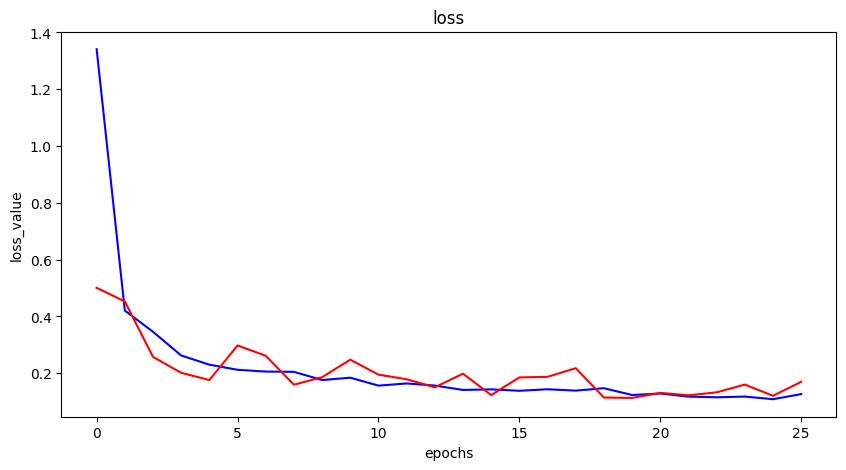

In [21]:
plt.figure(figsize=(10,5))
plt.plot(model_main.history.history['loss'],color='b',label='Training loss')
plt.plot(model_main.history.history['val_loss'],color='r',label='Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss_value")
plt.title("loss")

Text(0.5, 1.0, 'accuracy graph')

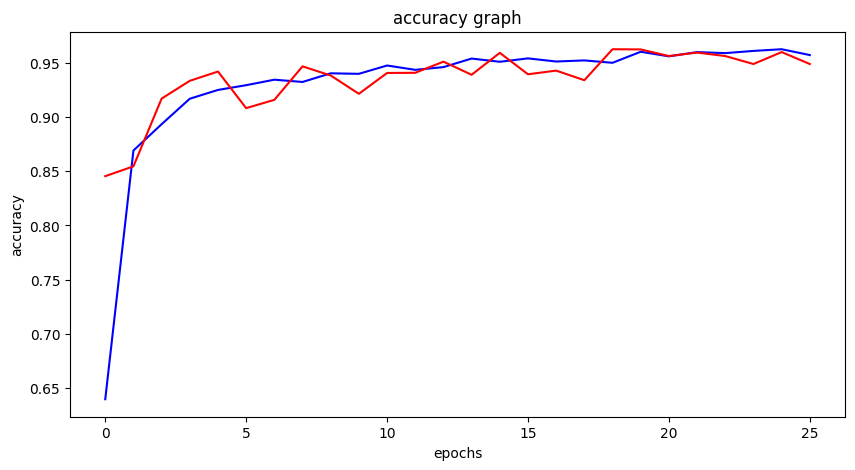

In [22]:
plt.figure(figsize=(10,5))
plt.plot(model_main.history.history['accuracy'],color='b',label='Training accuracy')
plt.plot(model_main.history.history['val_accuracy'],color='r',label='Validation accsuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy graph")